In [1]:
# Importng important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('/Users/juhimishra/Downloads/final car price.xlsx')
df.head()

Brand                        Model                 variant  \
0   Maruti     ['Ciaz', 'VDI+', 'SHVS']                  MANUAL   
1  Hyundai  ['Verna', 'FLUIDIC', '1.4']  74,515km (23 Jun 2021)   
2   Maruti   ['Swift', 'VXI', 'MANUAL']  25,472km (27 Jun 2021)   
3  Hyundai     ['i20', 'SPORTZ', '1.2']                  MANUAL   
4  Renault    ['Kwid', 'RXL', 'MANUAL']                  MANUAL   

   Manufacturing Year  driven_klms    Fuel no_of_owners Location   Price  
0              2015.0  1,21,025 km  Diesel    2nd Owner    DELHI  504499  
1              2014.0    74,650 km  Diesel    1st Owner    DELHI  563999  
2              2019.0    25,529 km  Petrol    1st Owner    DELHI  599799  
3              2013.0    29,332 km  Petrol    2nd Owner    DELHI  389799  
4              2019.0     3,946 km  Petrol    1st Owner    DELHI  362099

In [3]:
df.shape

(5231, 9)

Total no of rows are 5231 and columns are 9

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5231 entries, 0 to 5230
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               5231 non-null   object 
 1   Model               5231 non-null   object 
 2   variant             5169 non-null   object 
 3   Manufacturing Year  4735 non-null   float64
 4   driven_klms         5231 non-null   object 
 5   Fuel                5214 non-null   object 
 6   no_of_owners        5171 non-null   object 
 7   Location            5231 non-null   object 
 8   Price               5231 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 367.9+ KB


in this dataset all column except manufacturing year and price all are in object form which we need to convert to integer or float form so that our machine algorith can understand

In [5]:
df.isna().sum().to_frame('no of missing data')

no of missing data
Brand                                0
Model                                0
variant                             62
Manufacturing Year                 496
driven_klms                          0
Fuel                                17
no_of_owners                        60
Location                             0
Price                                0

There are total 4 columns where null values are present we need to work on the same.

In [6]:
df['Manufacturing Year'] = df['Manufacturing Year'].replace(np.NaN,df['Manufacturing Year'].mean())
df['variant'] = df['variant'].replace(np.NaN,df['variant'].mode()[0])
df['Fuel'] = df['Fuel'].replace(np.NaN,df['Fuel'].mode()[0])
df['no_of_owners'] = df['no_of_owners'].replace(np.NaN,df['variant'].mode()[0])

For continous column used mean to fill the null values and for categorical column used mode 

In [7]:
df.isna().sum().to_frame('no of missing data')

no of missing data
Brand                                0
Model                                0
variant                              0
Manufacturing Year                   0
driven_klms                          0
Fuel                                 0
no_of_owners                         0
Location                             0
Price                                0

### EDA

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Hyundai'),
  Text(2, 0, 'Renault'),
  Text(3, 0, 'Volkswagen'),
  Text(4, 0, 'Audi'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'Mahindra'),
  Text(7, 0, 'Toyota'),
  Text(8, 0, 'Skoda'),
  Text(9, 0, 'Honda'),
  Text(10, 0, 'RENAULT'),
  Text(11, 0, 'Tata'),
  Text(12, 0, 'KIA'),
  Text(13, 0, 'Nissan'),
  Text(14, 0, 'MG'),
  Text(15, 0, 'BMW'),
  Text(16, 0, 'Ssangyong'),
  Text(17, 0, 'Datsun'),
  Text(18, 0, 'Mercedes'),
  Text(19, 0, 'Jeep'),
  Text(20, 0, 'Mercedes-Benz'),
  Text(21, 0, 'Porsche'),
  Text(22, 0, 'Jaguar'),
  Text(23, 0, 'Chevrolet'),
  Text(24, 0, 'Land'),
  Text(25, 0, 'Volvo'),
  Text(26, 0, 'Bentley'),
  Text(27, 0, 'Kia'),
  Text(28, 0, 'Mitsubishi'),
  Text(29, 0, 'Other'),
  Text(30, 0, 'Bmw'),
  Text(31, 0, 'Mg'),
  Text(32, 0, 'Bajaj'),
  Te

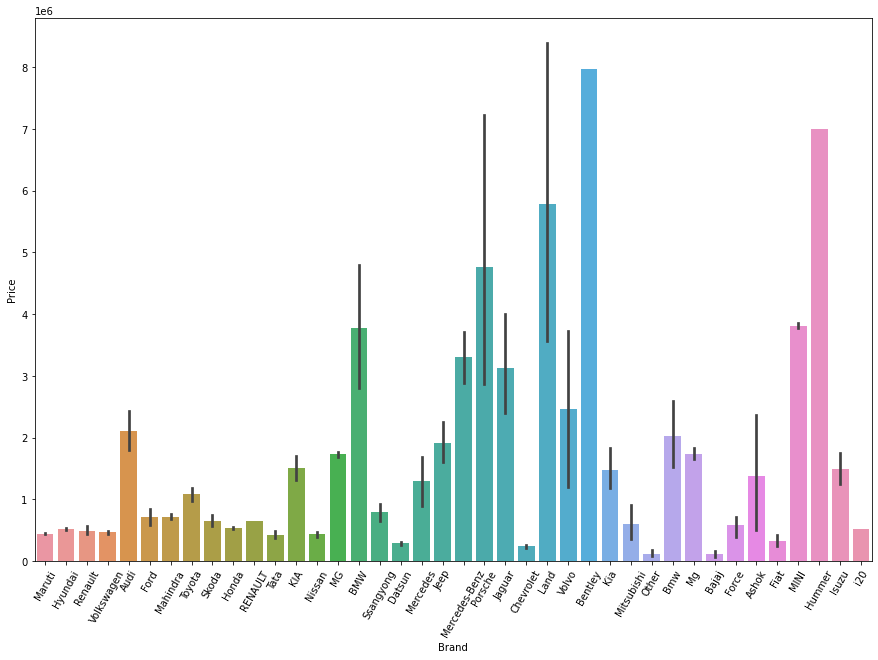

In [8]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'Brand', y = 'Price', data = df)
plt.xticks(rotation = 60)

Bentley we can see in car is having higher price value followed by hummer. Which means these cars are premium car with higher price value.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, '1962.0'),
  Text(1, 0, '1994.0'),
  Text(2, 0, '1997.0'),
  Text(3, 0, '1998.0'),
  Text(4, 0, '1999.0'),
  Text(5, 0, '2000.0'),
  Text(6, 0, '2001.0'),
  Text(7, 0, '2002.0'),
  Text(8, 0, '2003.0'),
  Text(9, 0, '2004.0'),
  Text(10, 0, '2005.0'),
  Text(11, 0, '2006.0'),
  Text(12, 0, '2007.0'),
  Text(13, 0, '2008.0'),
  Text(14, 0, '2009.0'),
  Text(15, 0, '2010.0'),
  Text(16, 0, '2011.0'),
  Text(17, 0, '2012.0'),
  Text(18, 0, '2013.0'),
  Text(19, 0, '2014.0'),
  Text(20, 0, '2015.0'),
  Text(21, 0, '2015.0485744456178'),
  Text(22, 0, '2016.0'),
  Text(23, 0, '2017.0'),
  Text(24, 0, '2018.0'),
  Text(25, 0, '2019.0'),
  Text(26, 0, '2020.0'),
  Text(27, 0, '2021.0'),
  Text(28, 0, '2918.0')])

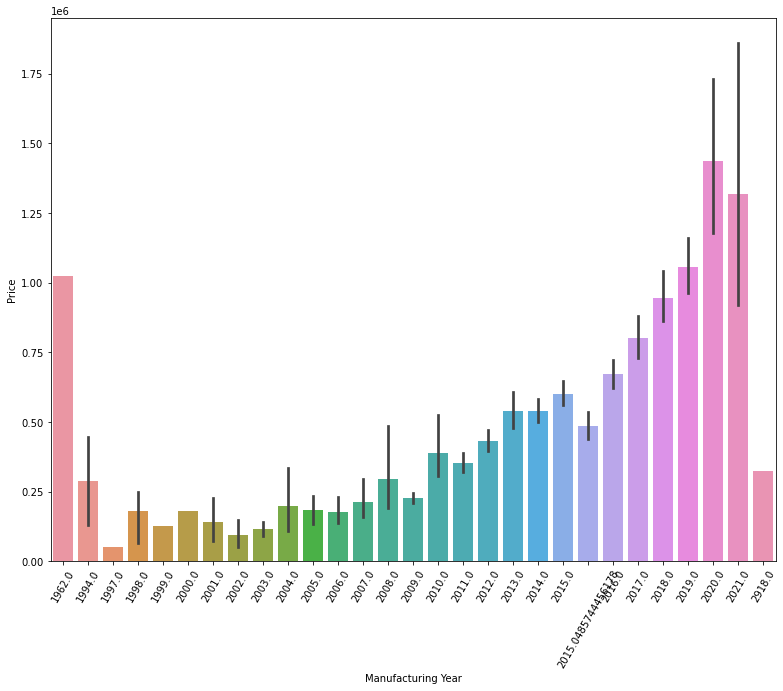

In [9]:
plt.figure(figsize=(13,10))
sns.barplot(x = 'Manufacturing Year', y = 'Price', data = df)
plt.xticks(rotation = 60)

As we know that even in second hand purchase maximum demand is for latest manufactured car . Here with the help of barplot we can observe that
year 2020manufatured car are having higher price value.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Diesel'),
  Text(1, 0, 'Petrol'),
  Text(2, 0, 'Petrol + CNG'),
  Text(3, 0, 'Petrol + Cng'),
  Text(4, 0, 'CNG + Cng'),
  Text(5, 0, 'CNG'),
  Text(6, 0, 'PETROL'),
  Text(7, 0, 'DIESEL'),
  Text(8, 0, 'CNG & HYBRIDS'),
  Text(9, 0, 'ELECTRIC'),
  Text(10, 0, 'LPG'),
  Text(11, 0, 'Petrol + LPG')])

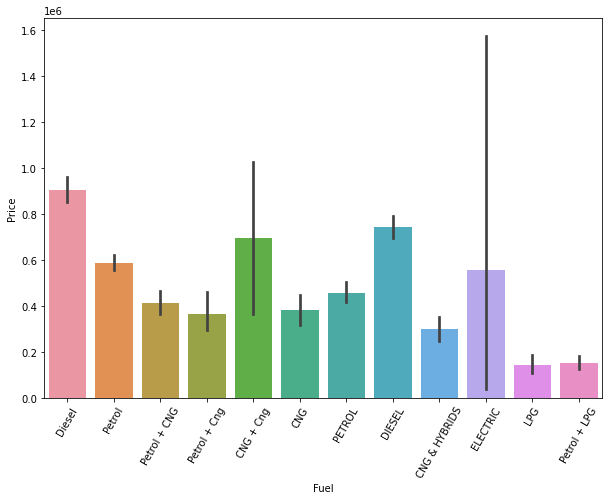

In [10]:
plt.figure(figsize=(10,7))
sns.barplot(x = 'Fuel', y = 'Price', data = df)
plt.xticks(rotation = 60)

Here with the help of barplot we can see that diesel car afre having higher price value. Which is obvious even new car too 
diesel engine do have higher price value.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '2nd Owner'),
  Text(1, 0, '1st Owner'),
  Text(2, 0, '3rd Owner'),
  Text(3, 0, '4th Owner'),
  Text(4, 0, '5th Owner'),
  Text(5, 0, 'Second'),
  Text(6, 0, 'First'),
  Text(7, 0, 'Third'),
  Text(8, 0, '1st'),
  Text(9, 0, '2nd'),
  Text(10, 0, '4th'),
  Text(11, 0, '3rd'),
  Text(12, 0, 'Manual'),
  Text(13, 0, 'Fourth'),
  Text(14, 0, '4+'),
  Text(15, 0, 'First Owner'),
  Text(16, 0, 'Second Owner'),
  Text(17, 0, 'Fourth Owner'),
  Text(18, 0, 'Third Owner')])

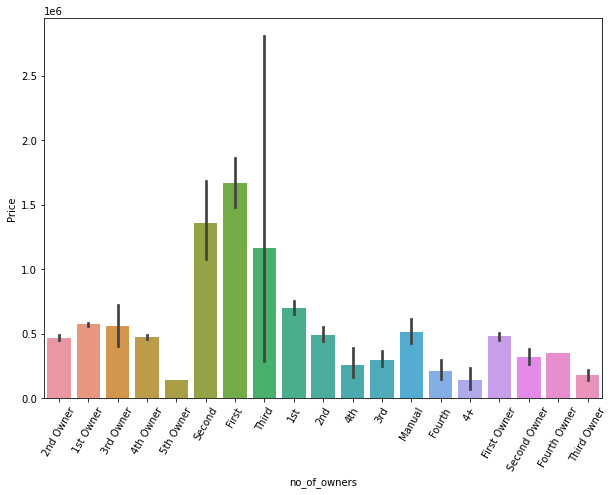

In [11]:
plt.figure(figsize=(10,7))
sns.barplot(x = 'no_of_owners', y = 'Price', data = df)
plt.xticks(rotation = 60)

Car with 1st owner means who is selling for first time there car are having higher price. This is obvious as 1st handed used car
have been used by only one person who owned the car and the condition of car will be in better position compare to sold by 2nd or more than that onwer

#### Data Cleaning

In [12]:
# Dropping the columns as not required 
df.drop(columns=['variant'],inplace=True)

In [13]:
df.columns

Index(['Brand', 'Model', 'Manufacturing Year', 'driven_klms', 'Fuel',
       'no_of_owners', 'Location', 'Price'],
      dtype='object')

In [14]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Renault', 'Volkswagen', 'Audi', 'Ford',
       'Mahindra', 'Toyota', 'Skoda', 'Honda', 'RENAULT', 'Tata', 'KIA',
       'Nissan', 'MG', 'BMW', 'Ssangyong', 'Datsun', 'Mercedes', 'Jeep',
       'Mercedes-Benz', 'Porsche', 'Jaguar', 'Chevrolet', 'Land', 'Volvo',
       'Bentley', 'Kia', 'Mitsubishi', 'Other', 'Bmw', 'Mg', 'Bajaj',
       'Force', 'Ashok', 'Fiat', 'MINI', 'Hummer', 'Isuzu', 'i20'],
      dtype=object)

In [15]:
df['Model'].unique()

array(["['Ciaz', 'VDI+', 'SHVS']", "['Verna', 'FLUIDIC', '1.4']",
       "['Swift', 'VXI', 'MANUAL']", ..., "['Zen', 'Estilo']",
       "['Corolla', 'Altis']", "['Santro', 'Xing']"], dtype=object)

In [16]:
df['driven_klms'].unique()

array(['1,21,025 km', '74,650 km', '25,529 km', ..., '22,260 Kms',
       '67,521 Kms', '79,613 Kms'], dtype=object)

In [17]:
df['Fuel'].unique()

array(['Diesel', 'Petrol', 'Petrol + CNG', 'Petrol + Cng', 'CNG + Cng',
       'CNG', 'PETROL', 'DIESEL', 'CNG & HYBRIDS', 'ELECTRIC', 'LPG',
       'Petrol + LPG'], dtype=object)

In [18]:
df['no_of_owners'].unique()

array(['2nd Owner', '1st Owner', '3rd Owner', '4th Owner', '5th Owner',
       'Second', 'First', 'Third', '1st', '2nd', '4th', '3rd', 'Manual',
       'Fourth', '4+', 'First Owner', 'Second Owner', 'Fourth Owner',
       'Third Owner'], dtype=object)

In [19]:
df['Location'].unique()

array(['DELHI', 'GURGAON', 'CHANDIGARH', ...,
       'Magrath Rd, Ashok Nagar, Bengaluru, Karnataka 560025,',
       'MCGM Parking Lodha Fiorenza Ground Floor Adjacent Hub Mall Goregaon East Mumbai,',
       'MCGM Parking The Address Wadhwa Ground Floor Opp R-City Mall Ghatkoper West Mumbai,'],
      dtype=object)

### Feature Engineering

In [20]:
le = LabelEncoder()
df1 = le.fit_transform(df['Brand'])
df['Brand']=df1

df2 = le.fit_transform(df['Model'])
df['Model']=df2

df4 = le.fit_transform(df['driven_klms'])
df['driven_klms'] = df4

df5 = le.fit_transform(df['Fuel'])
df['Fuel'] = df5

df6 = le.fit_transform(df['no_of_owners'])
df['no_of_owners'] = df6

df7 = le.fit_transform(df['Location'])
df['Location'] = df7

In [21]:
df.tail()

Brand  Model  Manufacturing Year  driven_klms  Fuel  no_of_owners  \
5226     23    658              2012.0          136     8             1   
5227     11    792              2014.0         1481     8             1   
5228     23   1676              2017.0          744     0             1   
5229     23   1579              2018.0         2358     4             1   
5230     37   1634              2013.0         2677     4             1   

      Location   Price  
5226       524  221500  
5227       524  592000  
5228       523  423000  
5229       524  610000  
5230       524  422500

Here using label encoder converted all object datatype to integer form so that our machine algorithm can understand and perform accordingly

### Model Building

In [22]:
x = df.drop(columns = ['Price'])
y = df['Price']

all the features been stored in x varibale and target in y variable

In [23]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler

array([[ 0.31810234, -0.34236168, -0.00376294, ..., -0.89628014,
        -0.15247742, -1.20729296],
       [-0.85628778,  1.33875498, -0.08123036, ..., -0.89628014,
        -0.5888064 , -1.20729296],
       [ 0.31810234,  1.19265342,  0.30610674, ...,  0.9176057 ,
        -0.5888064 , -1.20729296],
       ...,
       [ 0.31810234,  1.3823957 ,  0.1511719 , ..., -2.71016598,
        -0.5888064 , -0.19125696],
       [ 0.31810234,  1.19834569,  0.22863932, ..., -0.89628014,
        -0.5888064 , -0.18811134],
       [ 1.96224852,  1.30270394, -0.15869778, ..., -0.89628014,
        -0.5888064 , -0.18811134]])

scaled all the features using standard scaler to bring the features to same unit

In [24]:
# importing libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge,Lasso,LassoCV,RidgeCV

In [25]:
maxscore = 0
maxrs = 0

for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.30,random_state = i)
    dt = DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    pred = dt.predict(x_test)
    rsc = r2_score(y_test,pred)
    if rsc>maxscore:
        maxscore=rsc
        maxrs=i
print("Best r2 score is:",maxscore,"On Random state: ",maxrs)

Best r2 score is: 0.6230166389689087 On Random state:  424


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.30,random_state=i)

splitted train and test to 70% and 30% respectively for training and predicting purpose

In [27]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(r2_score(y_test,pred))

-6.145800494773672


In [28]:
print(cross_val_score(lr,x_scaler,y,cv=5).mean())

-0.8374086099585621


In [29]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print(r2_score(y_test,pred))

0.1845702030013434


In [30]:
print(cross_val_score(dt,x_scaler,y,cv=5).mean())

-0.2811193000855377


In [31]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print(r2_score(y_test,pred))

0.5896196037638823


In [32]:
print(cross_val_score(rf,x_scaler,y,cv=5).mean())

0.3948984602333763


Random forest which is performing best among all so will do hyperparameter tuning on the same using grid search cv

### Hyperparameter Tuning

In [33]:
# RandomForestRegressor
param = {'n_estimators':[300,500,700,900],
        'criterion':['mse','mae'],
        'max_depth':[2,4,6,8,10],
        'max_features':['auto','sqrt','log2']}

In [34]:
GC = GridSearchCV(rf,param,cv=5)

In [35]:
GC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [300, 500, 700, 900]})

In [36]:
GC.best_params_

{'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 900}

In [38]:
final_rfc = RandomForestRegressor(criterion = 'mse',max_depth = 10, max_features = 'auto',n_estimators = 900)
final_rfc.fit(x_train,y_train)
pred = final_rfc.predict(x_test)
r2score = r2_score(pred,y_test)
print(r2score*100)

35.76097801456829


### Save the Model

In [39]:
import joblib
joblib.dump(final_rfc,'Finalmodel Car price')

['Finalmodel Car price']

### Predicting Model on test data

In [40]:
# prediction using the same model
loaded_model = joblib.load(open('Finalmodel car price', 'rb'))

In [41]:
prediction=loaded_model.predict(x_test)
prediction=pd.DataFrame(prediction) # Converting into Data frame
prediction

0
0     2.025219e+05
1     6.193465e+05
2     5.579871e+05
3     7.380990e+05
4     6.126893e+05
...            ...
1565  1.667244e+05
1566  8.597936e+05
1567  1.497579e+06
1568  3.429992e+05
1569  6.228847e+05

[1570 rows x 1 columns]